In [34]:
# Projeto Aplicado 3 
# Recomendação de Filmes - The Movies Dataset
# O arquivo disponibilizado no Kaggle possui vários CSV, porém os que contém informações relevantes são somente os 3 abaixo


import pandas as pd
import glob

credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv', low_memory=False)

%store credits
%store movies

Stored 'credits' (DataFrame)
Stored 'movies' (DataFrame)


C:\Users\renan\AppData\Roaming\Python\Python312\site-packages\IPython\extensions\storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/credits requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj
C:\Users\renan\AppData\Roaming\Python\Python312\site-packages\IPython\extensions\storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/movies requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [35]:
credits.head()
credits.dtypes
credits['movie_id'].dropna

<bound method Series.dropna of 0        19995
1          285
2       206647
3        49026
4        49529
         ...  
4798      9367
4799     72766
4800    231617
4801    126186
4802     25975
Name: movie_id, Length: 4803, dtype: int64>

In [36]:
movies.head()
movies.dtypes

# Ao executar o código acima, podemos perceber que a coluna ID do dataset Movies é do tipo Object, sendo necessário alterar a mesma para o tipo int64.
# Para isso, devemos realizar a alteração abaixo.

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [37]:
# Juntando as duas tabelas com base na coluna ID, realizando um merge.

movies = movies.merge(credits, left_on="id", right_on="movie_id")

movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# Podemos verificar que a coluna _Overview_ descreve o filme.

In [38]:
movies['overview']

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

# Já a coluna _"Genres"_ informa o gênero de cada filme. Pode-se notar também que a coluna está no formato _JSON_

In [39]:
movies['genres'].unique().tolist()

['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]',
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]',
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]',
 '[{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]',
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]',
 '[{"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}]',
 '[{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]',
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 10751, "name": "Family"}]',
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}]',
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fanta

# Realizando algumas análises com base nas informações dos datasets, a começar com o orçamento dos filmes.

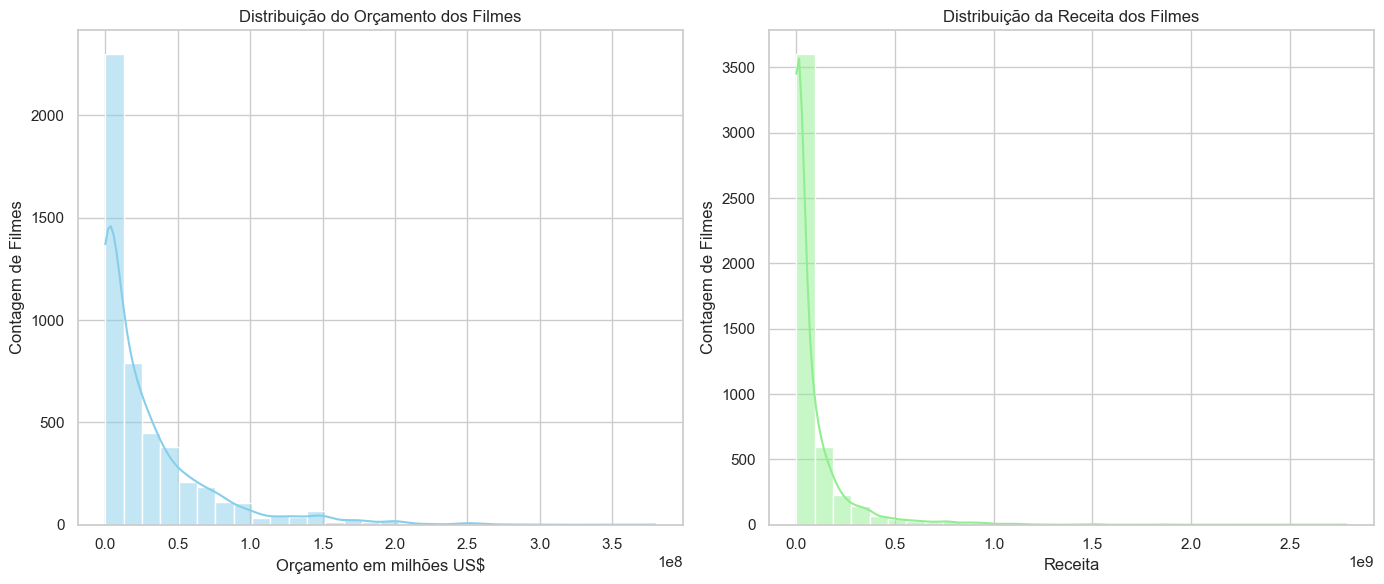

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Orçamento
sns.histplot(movies['budget'], bins=30, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribuição do Orçamento dos Filmes')
ax[0].set_xlabel('Orçamento em milhões US$')
ax[0].set_ylabel('Contagem de Filmes')

# Receita
sns.histplot(movies['revenue'], bins=30, kde=True, ax=ax[1], color='lightgreen')
ax[1].set_title('Distribuição da Receita dos Filmes')
ax[1].set_xlabel('Receita')
ax[1].set_ylabel('Contagem de Filmes')

plt.tight_layout()
plt.show()

* Orçamento: A maioria dos filmes tem um orçamento relativamente baixo, com poucos filmes apresentando orçamentos muito altos. A distribuição é fortemente inclinada para a direita, indicando que filmes com orçamentos extremamente elevados são raros.
* Receita: A distribuição da receita é semelhante à do orçamento, com a maioria dos filmes gerando receitas menores e um número menor de filmes alcançando receitas extremamente altas. A distribuição também é inclinada para a direita.

C:\Users\renan\AppData\Local\Temp\ipykernel_13732\3292618797.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=contagem_generos.index[:15], x=contagem_generos.values[:15], palette='coolwarm')


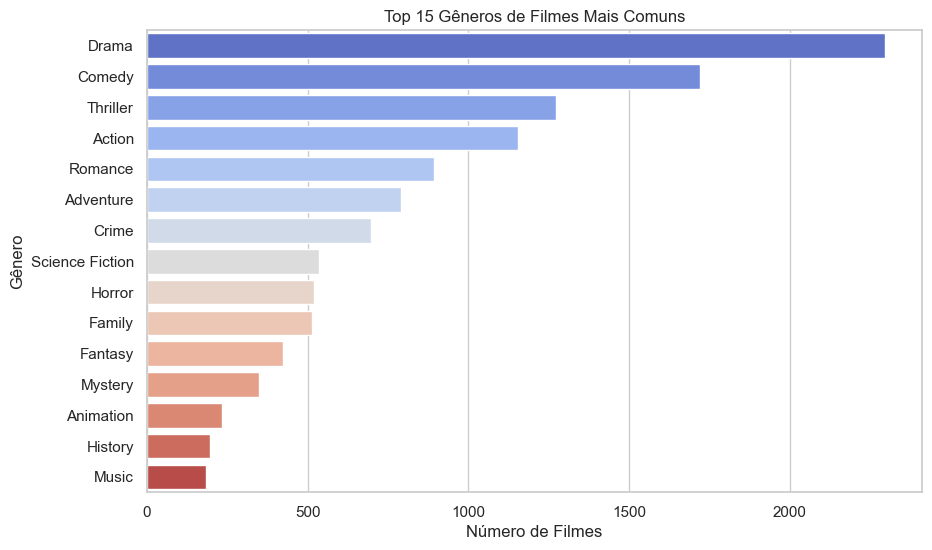

In [41]:
# O padrão para todas as colunas contendo informações é JSON, então devemos tratar essas colunas para limpar os dados de uma maneira mais correta para tratamento.

import json

def extrair_generos(cadeia_generos):
    lista_generos = json.loads(cadeia_generos.replace('\'', '"'))
    return [genero['name'] for genero in lista_generos]

todos_generos = movies['genres'].apply(extrair_generos).explode()
contagem_generos = todos_generos.value_counts()

# gerando um gráfico que mostre a contagem de filmes por gênero
plt.figure(figsize=(10, 6))
sns.barplot(y=contagem_generos.index[:15], x=contagem_generos.values[:15], palette='coolwarm')
plt.title('Top 15 Gêneros de Filmes Mais Comuns')
plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')
plt.show()


* Podemos ver que Drama é a categoria com mais filmes, seguido de comédia e trilers

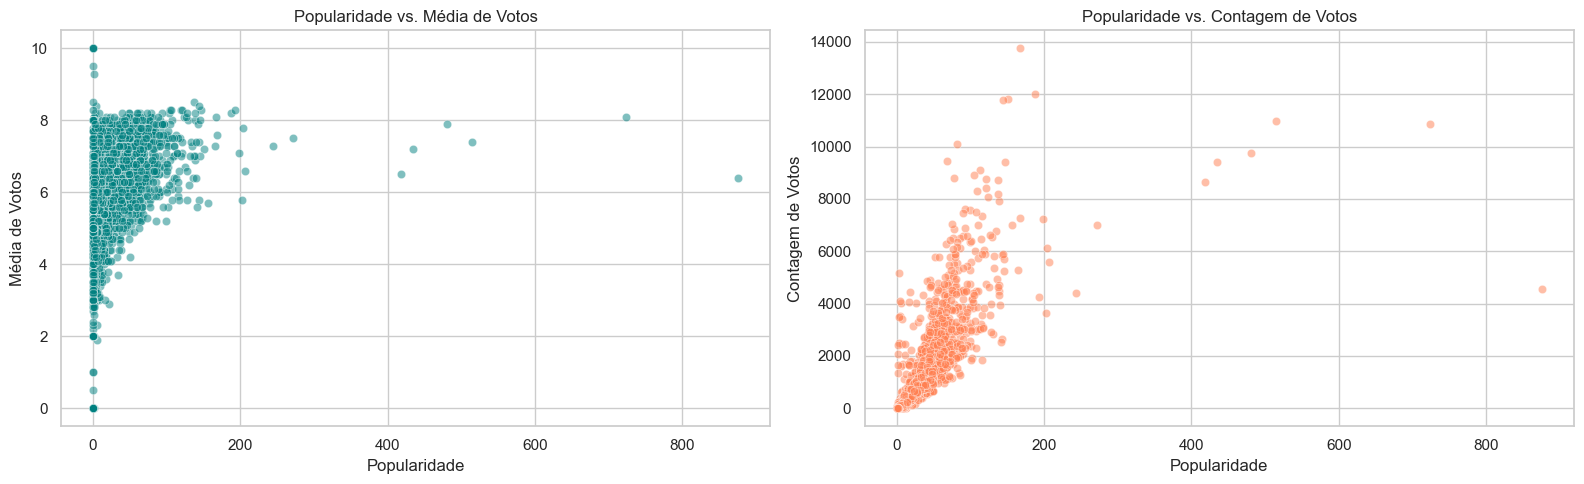

In [42]:
plt.figure(figsize=(16, 5))

# Popularidade vs. Média de Votos
plt.subplot(1, 2, 1)
sns.scatterplot(data=movies, x='popularity', y='vote_average', color='teal', alpha=0.5)
plt.title('Popularidade vs. Média de Votos')
plt.xlabel('Popularidade')
plt.ylabel('Média de Votos')

# Popularidade vs. Contagem de Votos
plt.subplot(1, 2, 2)
sns.scatterplot(data=movies, x='popularity', y='vote_count', color='coral', alpha=0.5)
plt.title('Popularidade vs. Contagem de Votos')
plt.xlabel('Popularidade')
plt.ylabel('Contagem de Votos')

plt.tight_layout()
plt.show()


* Popularidade vs. Média de Votos: Não parece haver uma relação clara ou forte entre a popularidade de um filme e sua média de votos. Filmes com diferentes níveis de popularidade podem ter uma ampla gama de médias de votos, sugerindo que a popularidade não é diretamente proporcional à qualidade percebida (como indicado pela média de votos).

* Popularidade vs. Contagem de Votos: Existe uma tendência mais perceptível aqui, onde filmes mais populares tendem a ter uma maior contagem de votos. Isso faz sentido, pois podemos esperar que filmes mais populares atraiam mais espectadores e, consequentemente, mais votos.

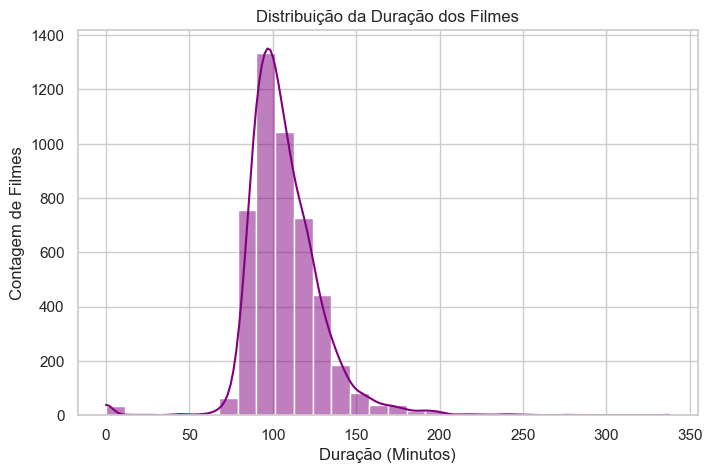

In [43]:
#Análise da duração de filmes

plt.figure(figsize=(8, 5))
sns.histplot(movies['runtime'].dropna(), bins=30, kde=True, color='purple')
plt.title('Distribuição da Duração dos Filmes')
plt.xlabel('Duração (Minutos)')
plt.ylabel('Contagem de Filmes')
plt.show()


* A maioria dos filmes tem uma duração entre 90 e 120 minutos, que é típica para longas-metragens.
* A distribuição apresenta uma cauda longa à direita, indicando a presença de alguns filmes com durações significativamente maiores.
* Há um pequeno número de filmes com duração inferior a 60 minutos, o que pode incluir curtas-metragens ou outros formatos especiais.